In [51]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
iris_data=pd.read_csv("D:/Desktop/Desktop_Important/Machine Learning/iris.csv")

In [4]:
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris_data['Species'].value_counts()

virginica     50
setosa        50
versicolor    49
Name: Species, dtype: int64

In [7]:
iris_data.isnull().sum()

Sepal.Length    2
Sepal.Width     2
Petal.Length    3
Petal.Width     1
Species         2
dtype: int64

In [8]:
iris_data_nn = iris_data.dropna()

In [9]:
iris_data_nn.shape

(145, 5)

In [11]:
features = iris_data_nn.drop(['Species'],axis=1)

In [12]:
target = iris_data_nn['Species']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

In [17]:
decision_tree = DecisionTreeClassifier()

In [18]:
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
prediction = decision_tree.predict(x_test)

In [20]:
print(accuracy_score(y_test,prediction))

0.9090909090909091


In [21]:
pd.crosstab(y_test,prediction)

col_0,setosa,versicolor,virginica
Species,,,
setosa,15,0,0
versicolor,0,11,0
virginica,0,4,14


In [22]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.73      1.00      0.85        11
   virginica       1.00      0.78      0.88        18

    accuracy                           0.91        44
   macro avg       0.91      0.93      0.91        44
weighted avg       0.93      0.91      0.91        44



In [29]:
np.unique(target)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [33]:
plot_tree?

[Text(334.8, 489.24, 'Petal.Width <= 0.8\nentropy = 0.664\nsamples = 101\nvalue = [31, 38, 32]\nclass = versicolor'),
 Text(251.10000000000002, 380.52000000000004, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(418.5, 380.52000000000004, 'Petal.Length <= 4.85\nentropy = 0.496\nsamples = 70\nvalue = [0, 38, 32]\nclass = versicolor'),
 Text(167.4, 271.8, 'Petal.Width <= 1.7\nentropy = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(83.7, 163.08000000000004, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(251.10000000000002, 163.08000000000004, 'Sepal.Length <= 6.05\nentropy = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(167.4, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(334.8, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(669.6, 271.8, 'Petal.Width <= 1.75\nentropy = 0.114\nsamples = 33\nvalu

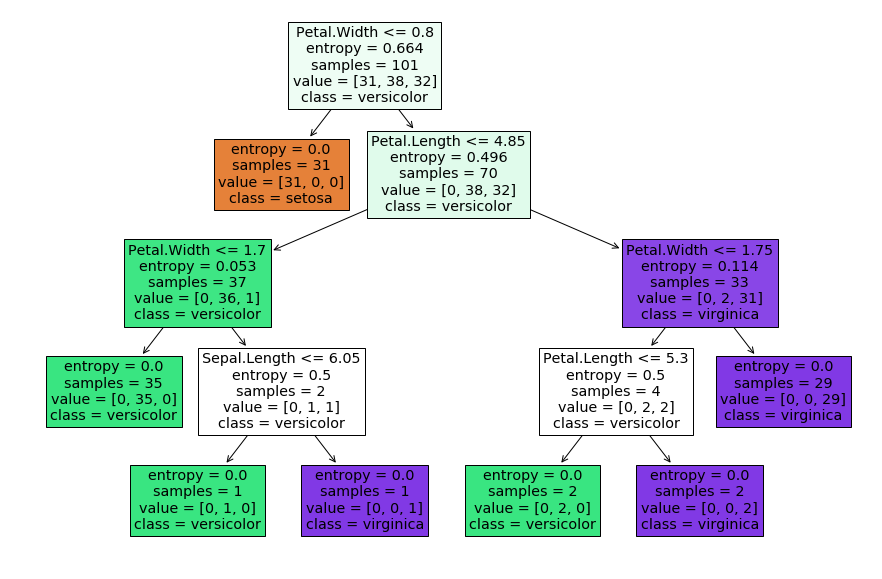

In [32]:
fig = plt.figure(figsize=(15,10))
fn = features.columns.tolist()
tn = ['setosa', 'versicolor', 'virginica']
plot_tree(decision_tree,
         feature_names = fn,
         class_names = tn,
         filled=True)

In [45]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [36]:
export_graphviz?

In [43]:
# create a dot file
dotdata = export_graphviz(decision_tree,out_file=None,feature_names = fn,
             class_names = tn,
             filled=True)

In [49]:
pydotplus.graph_from_dot_file?

In [44]:
# convert the dot into graph
# For that you should have Graphiz installed in your machine
graph = pydotplus.graph_from_dot_data(dotdata)

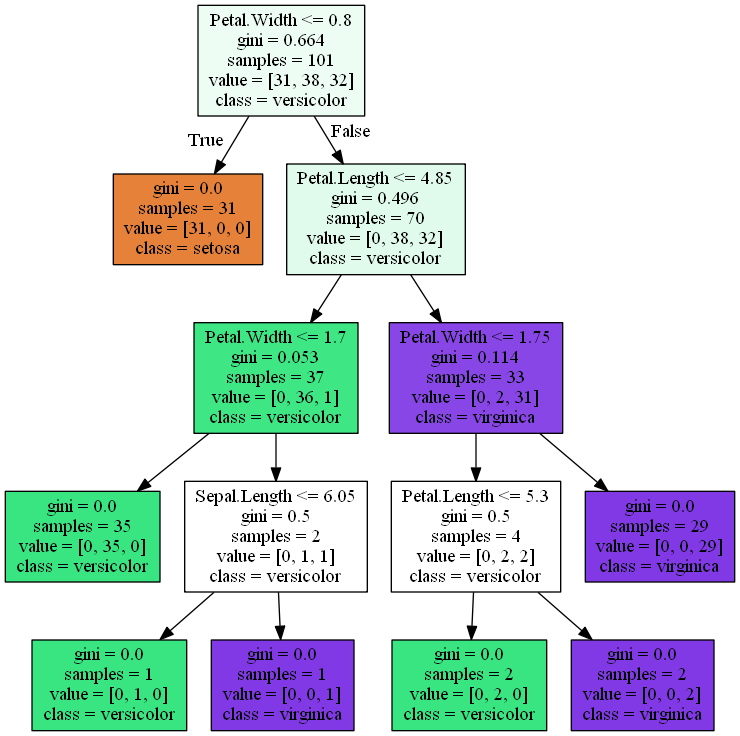

In [48]:
# convert the graph into png
Image(graph.create_png())